# [1] Hypothesis testing

# 1. One-sample tests

## 1.1. Purpose

- Single sample of continuous data
- Used to find out if the sample came from a parent distribution, with given mean or median

## 1.2. Choice of test

- One sample t-test, and one sample Wilcoxon signed rank test
- Each have different assmptions
- If the data is normally distributed, one-sample t-test is appropriate
- If the data isn't normally distributed, but their distribution is symmetric, and the sample size is small, then a one-sample Wilcoxon signed rank test is appropriate

## 1.3. One-sample t-test (MEAN)
1. Set out the hypothesis
2. Summarise and visualise the data
3. Implement statistical test
4. Assess assumptions
5. Interpret output and presentation of results

### Hypothesis

E.g. Body lengths of guppies. We want to test whether the data supports the hypothesis, that the mean body is 20 mm.

- H0: Mean = 20 mm
- H1: Mean =/= 20 mm

One sampled, two tailed t-test

In [6]:
import pandas as pd
fishlengthDF = pd.read_csv('data/CS1-onesample.csv')
guanapo = fishlengthDF['Guanapo']
guanapo.describe()

count    29.000000
mean     18.296552
std       2.584636
min      11.200000
25%      17.500000
50%      18.800000
75%      19.700000
max      23.300000
Name: Guanapo, dtype: float64

Text(0, 0.5, 'Length (mm)')

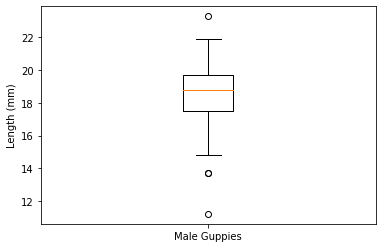

In [5]:
import matplotlib.pyplot as plt
plt.boxplot(guanapo, labels=['Male Guppies'])
plt.ylabel('Length (mm)')

### One-sample, two-tailed t-test

In [8]:
from scipy.stats import ttest_1samp
ttest_1samp(guanapo, 20)

Ttest_1sampResult(statistic=-3.5491839564647205, pvalue=0.0013868577835348004)

- Result gives t-value and p-value
- p-value gives the probability of us getting a sample such as ours, if the null hypothesis were true

- High p-value: High probability of observing a sample like ours, and null hypothesis is probably true
- Low p-value: Low probability of observing a sample like ours, and null hypotesis is probably not true

- People like definite answers, so we pick a significance level, to say something more decisive
- Standard significance level is 0.05, and since our p-value is smaller than this, it is unlikely that we would have this particular sample, if the null hypothesis were true
- Therefore, we can reject H0

- A one-sample t-test indicated, that the mean body length of guppies (u = 18.29) differs significantly from 20 mm (t = -3.55, p = 0.014)

### Assumptions

1. The parent distribution from which the sample is taken is normally distributed, thus the samples are normally distributed
<br>
<br>
N.B. The t-test is fairly robust in situations where samples are not normal. For large sample sizes, t-test can be used without worrying about normality
<br>
<br>
2. Each data point in the sample is independent of the others
<br>
<br>
- Three ways of checking for normality
1. Histogram
2. Quartile-quartile plot
3. Shaprio-Wilk test

### Histogram

(array([1., 0., 0., 2., 1., 0., 3., 1., 5., 7., 3., 2., 2., 1., 1.]),
 array([11.2       , 12.00666667, 12.81333333, 13.62      , 14.42666667,
        15.23333333, 16.04      , 16.84666667, 17.65333333, 18.46      ,
        19.26666667, 20.07333333, 20.88      , 21.68666667, 22.49333333,
        23.3       ]),
 <a list of 15 Patch objects>)

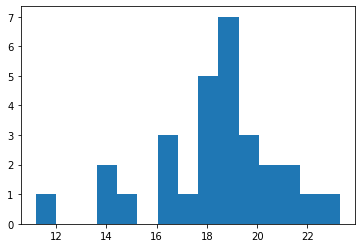

In [10]:
plt.hist(guanapo, bins=15)
# Appears to be unimodal and symmetric, however this is not that rigorous

### QQ plot

C:\Users\keish\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


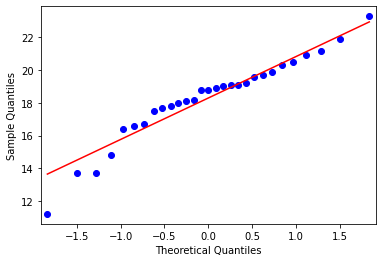

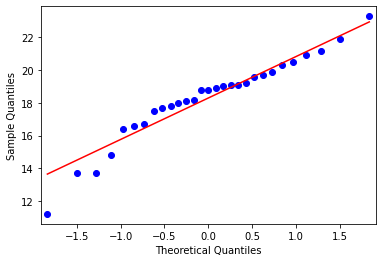

In [11]:
from statsmodels.graphics.gofplots import qqplot
qqplot(guanapo, line='s')

- If the data were normally distributed, then all of the points should lie on the diagonal red line
- The points lie quite close, but the sample quartiles from the lower end of the sample distribution are smaller than expected, if they were normally distributed
- This suggest that the sample distribtution is a bi more spread out to the left, than would be expected

1. Even from a normal distribution, points do not lie perfectly
2. Uniform distributions are more condensed than normal, and this is reflected in the QQ plot having a very pronounced S-shape pattern (snaking)
3. t distributions are more spread out than normal, and this gives a S-pattern which is a reflection of the one observed in the uniform
4. Exponential distributions are not symetric, and ar very skewed

### Shapiro-Wilk test

In [12]:
from scipy.stats import shapiro
shapiro(guanapo)

(0.9493839740753174, 0.17642046511173248)

- H0: Data are normally distributed
- As the p-value is bigger than 0.05, there is insufficient evidence to reject the null hypothesis, that the sample came from a normal distribution
- Shapiro-Wilk is sensitive to the sample size being considered
- For small samples, the test can be relaxed about normality, where as it can be overly strict for large samples

## 1.4 One-sample Wilcoxon signed-rank test (MEDIAN)
- Also considers a single sample, however we don't have to assume that the parent distribution is normally distributed
- It still needs to be symmetric
- In this test, we look to see if the median of the parent distributions differ significantly from a given hypothesised value (t-test looks at mean)

### Hypotheses
- H0: Median body length is 20mm
- H1: Median body length is not equal to 2--mm

In [13]:
from scipy.stats import wilcoxon
wilcoxon(guanapo-20, alternative='two-sided')
# Can manage one sided or two sided

WilcoxonResult(statistic=67.5, pvalue=0.0011760820729428206)

A one-sample Wilcoxon signed-rank test indicated, tat the median body length of male guppies (sample median=18.8mm) differs significantly from 20mm (V=67.5, n=29, p=0.0012)

### Assumptions

1. The parent distribution is symmetric
2. Each data point in the sample is independent of others

# 2. Two-sample tests
## 2.1. Purpose
- Used when we have two samples of continuous data, where we want to find out if these samples came from the same parent distribution

## 2.2. Choosing a test

1. Are the samples normally distributed?
2. How big are the samples?
3. Are the samples paired?
4. Do the samples have the same variance?

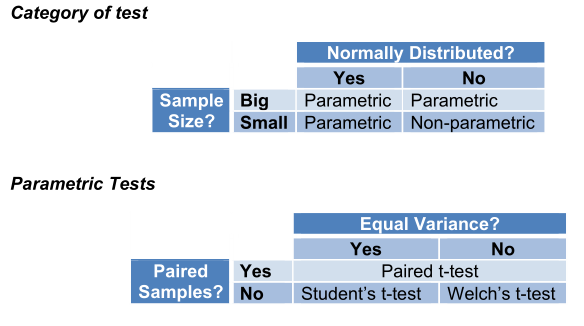

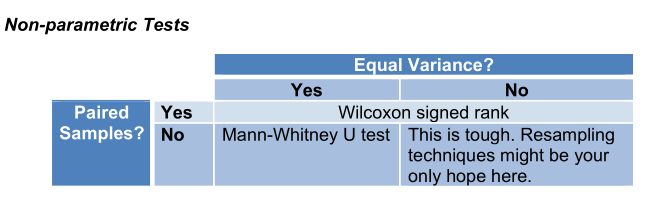

- The CLT means that with large samples, you can assume tests that assume normality of the parent population
- Tests that assume normality: Student's t-test, Welch's t-test and paired t-test

## 2.3. Student's t-test

- Assume both sample data sets are normally distributed and have eual variance
- Test to see if the means of the two samples differ significantly from each other

### Hypotheses
- H0: Mean body length does not differ (meanA = meanB)
- H1: Mean body length does differ between groups (meanA =/= meanB)


- Use a two-sample, two-tailed t-test, to see if we can reject the null hypothesis

In [21]:
rivers = pd.read_csv('data/CS1-twosample.csv')
rivers

,length,river
0,19.1,Guanapo
1,23.3,Guanapo
2,18.2,Guanapo
3,16.4,Guanapo
4,19.7,Guanapo
...,...,...
63,19.2,Aripo
64,20.3,Aripo
65,18.7,Aripo
66,21.1,Aripo


In [27]:
rivers_uns = rivers.pivot(columns='river', values='length')
guanapo = rivers_uns['Guanapo'].dropna()
aripo = rivers_uns['Aripo'].dropna()
guanapo.describe()

count    29.000000
mean     18.296552
std       2.584636
min      11.200000
25%      17.500000
50%      18.800000
75%      19.700000
max      23.300000
Name: Guanapo, dtype: float64

In [28]:
aripo.describe()

count    39.000000
mean     20.330769
std       1.780620
min      17.500000
25%      19.100000
50%      20.100000
75%      21.300000
max      26.400000
Name: Aripo, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x27abf3b0888>,
 'caps': [<matplotlib.lines.Line2D at 0x27abf3c3a08>,
 'boxes': [<matplotlib.lines.Line2D at 0x27abf3bcf88>,
 'medians': [<matplotlib.lines.Line2D at 0x27abf3c8e08>,
 'fliers': [<matplotlib.lines.Line2D at 0x27abf3ca988>,
 'means': []}

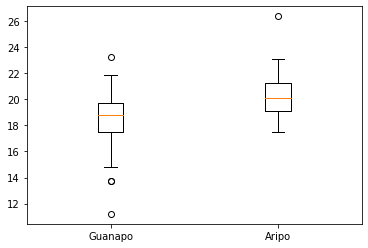

In [29]:
plt.boxplot([guanapo, aripo], labels=['Guanapo', 'Aripo'])

### Two-sample, two-tailed t-test

In [32]:
from statsmodels.stats.weightstats import ttest_ind

ttest_ind(guanapo, aripo, alternative='two-sided', usevar='pooled')
# Fourth argument says whether variance of two samples can be assumed equal
# This makes it a student's t-test, rather than a Welch's t-test

(-3.8432667461726275, 0.00027544021976337845, 66.0)

Output: Calculated t-value, p-value, degrees of freedom

A Student's t-test indicated that the mean body length of guppies in the Guanapo river (18.29mm) differs significantly from the mean body length of guppies in the Aripo river (20.33mm) (t=3.8433, df=66, p=0.0003)

### Assumptions
1. The parent distributions from which the samples are taken are both normally distributed
2. Each data point in the samples is independent of the others
3. The parent distributions should have the same variance

- Sample sizes are large, assume normal. If smaller, use tests from before
- Nothing can be done about independence
- Equality of variance can be tested using Bartlett's test (samples normally distributed) , or Levene's test (not normally distributed)
- Therefore we need to know if samples are normally distributd, to decide which variance test to use

In [33]:
shapiro(guanapo)

(0.9493839740753174, 0.17642046511173248)

In [34]:
shapiro(aripo)

(0.9359580278396606, 0.028022518381476402)

- While Guanapo is probably normally disttributed, Aripo is unlikely to be normally distributed
- Shaprio-Wilk test is quite sensitive to sample size. If the sample is large, then even small deviations from normality will cause the sample to fail
- Aripo has nearly 40 points, therefore can see why it failed

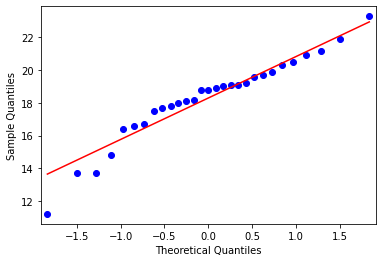

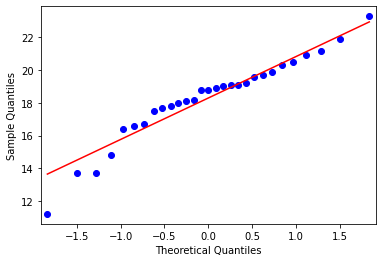

In [38]:
qqplot(guanapo, line='s')

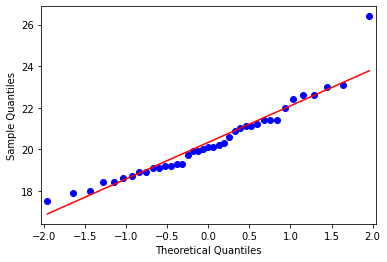

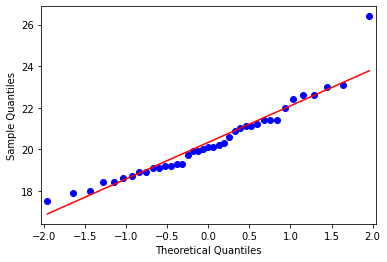

In [39]:
qqplot(aripo, line='s')